<a href="https://colab.research.google.com/github/yoshi2210/SoccerAnalytics/blob/main/SoccerMovieAnalysis_object2position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [7]:
# 1. Google drive has an target movie and output directory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!apt-get update && apt-get install imagemagick

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net/c2d4u.te

In [9]:
# 3. load Naraya libraries,  In order to avoid error, pillow re install is needed
import os
os.chdir('/content')
!git clone https://github.com/DonsetPG/narya.git
!cd narya && pip3 install -r requirements.txt
! pip install --ignore-installed Pillow==9.0.0

fatal: destination path 'narya' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 1.5.0 which is incompatible.
fastai 2.6.3 requires torchvision>=0.8.2, but you have torchvision 0.6.0 which is incompatible.


# Load data

In [10]:
# df1_save_path = '/content/drive/MyDrive/Soccer_analytics/video_base_yolov5x_img1280.txt' 
# df1_save_path = '/content/drive/MyDrive/Soccer_analytics/SOCCERMATCH_TrimA.txt' 
df1_save_path = '/content/drive/MyDrive/Soccer_analytics/TrimA.txt' 


In [11]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

# df1_save_path = '/content/drive/MyDrive/Soccer_analytics/video_base_yolov5x_img1280.txt' 
df1 = pd.read_csv(df1_save_path,header=None,sep=" ") 
# df2 = pd.read_csv(df2_save_path,header=None,sep=" ") 
cols = ['source_path','frame_idx+1','ID','bbox_left','bbox_top','bbox_w','bbox_h','nomean1','nomean2','nomean3','nomean4','nomean5','ReID','conf_val']
df1.columns=cols
# df2.columns=cols
# df= pd.concat([df1,df2])
df=df1

print('df.ReID.unique()=',df.ReID.unique())

# visualize player and ball tracking 
df['sports_ball_flag'] = np.where(df.ReID.str.contains('ball'),'detected','none')
df['person_flag'] = np.where(df.ReID.str.contains('person'),'detected','none')

df.ReID.unique()= ['1_person' '2_person' '3_person' '4_person' '5_person' '6_person'
 '7_person' '8_person' '9_person' '10_person' '11_person' '12_person'
 '13_person' '14_person' '15_person' '16_person' '17_person' '18_person'
 '19_person' '20_person' '21_person' '23_person' '26_person' '27_person'
 '28_person' '30_person' '29_person' '32_person' '33_person' '37_person'
 '38_person' '40_person' '41_person' '44_person' '45_person' '46_person'
 '47_sportsball' '50_person' '52_person' '55_tennisracket' '56_person'
 '57_person' '59_person' '67_tennisracket' '70_person' '72_person'
 '67_person' '74_person' '76_person' '67_sportsball' '89_person'
 '93_person' '95_person' '96_person' '99_person' '106_person' '112_person'
 '118_person' '121_person' '23_kite' '128_person' '130_person'
 '14_tennisracket' '12_tennisracket' '132_person' '142_person'
 '143_sportsball' '146_person' '147_person' '148_person' '153_sportsball'
 '155_person' '156_person' '157_person' '160_tennisracket' '161_person'
 '1

In [12]:
import os
import cv2

frame_output_path = '/content/drive/MyDrive/Soccer_analytics/TrimA' 
count = 0

import glob
import re
import os
from natsort import natsorted

img_path_list = glob.glob(frame_output_path+'/*.jpg')

img_path_list = [s for s in img_path_list if ' (' not in s]
print(img_path_list)


['/content/drive/MyDrive/Soccer_analytics/TrimA/frame17477.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17478.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17479.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17480.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17481.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17482.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17483.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17484.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17485.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17486.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17487.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17488.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17489.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17490.jpg', '/content/drive/MyDrive/Soccer_analytics/TrimA/frame17491.jpg', '/content/drive/MyDrive/Soccer_analytic

In [1]:
# img_list = []

# for img_path in natsorted(img_path_list):
#   print(img_path)
#   # cv2.imwrite(frame_output_path+"/frame%d.jpg" % count, image)     # save frame as JPEG file      
#   # success,image = vidcap.read()
#   # print('Read a new frame: ', success)
#   # # print('image path=',frame_output_path+"/frame%d.jpg" % count)
#   image = cv2.imread(img_path)   # read frame as cv2
#   img_list.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Load naraya libraries

In [4]:
# 3. load Naraya libraries,  In order to avoid error, pillow re install is needed
os.chdir('/content')
!git clone https://github.com/DonsetPG/narya.git
!cd narya && pip3 install -r requirements.txt
! pip install --ignore-installed Pillow==9.0.0

fatal: destination path 'narya' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 1.5.0 which is incompatible.
fastai 2.6.3 requires torchvision>=0.8.2, but you have torchvision 0.6.0 which is incompatible.


# Homography and team classification

In [15]:
# print(natsorted(img_path_list)[0])

# for frame_num, pre_image_path in enumerate(natsorted(img_path_list)):
#   print(pre_image_path)

In [ ]:
# Homography 
# 1. load pretrained model and apply pix2pix

import pandas as pd
import os

os.chdir('/content')
from narya.narya.models.gluon_models import TrackerModel
from narya.narya.utils.vizualization import merge_template
from gluoncv.utils import viz
import tensorflow as tf
import mxnet as mx
ctx = [mx.cpu()]

import numpy as np
import cv2
from matplotlib import pyplot as plt
from narya.narya.utils.vizualization import visualize
from narya.narya.utils.vizualization import rgb_template_to_coord_conv_template



# 2. load template image of soccer pitch filed
template = cv2.imread('narya/world_cup_template.png')
# if RGB gradation is preffered
#template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
template = cv2.resize(template, (1280,720))/255.
template = rgb_template_to_coord_conv_template(template)
# visualize(template=template)

# load homography pre-trained data 
from narya.narya.utils.homography import compute_homography, warp_image,warp_point
from narya.narya.utils.image import torch_img_to_np_img, np_img_to_torch_img, denormalize
from narya.narya.utils.utils import to_torch
import torch

from narya.narya.models.keras_models import DeepHomoModel

deep_homo_model = DeepHomoModel()

WEIGHTS_PATH = (
    "https://storage.googleapis.com/narya-bucket-1/models/deep_homo_model.h5"
)
WEIGHTS_NAME = "deep_homo_model.h5"
WEIGHTS_TOTAR = False

checkpoints = tf.keras.utils.get_file(
                WEIGHTS_NAME, WEIGHTS_PATH, WEIGHTS_TOTAR,
            )

deep_homo_model.load_weights(checkpoints)

# corners = deep_homo_model(image)
# print(corners)
# pred_homo = compute_homography(corners)[0]
# print(pred_homo)

########################################################################################
#3. Apply homography and have positional data


# Normalized image size
w =  512  
h =  512 

#original width and hight image/movie size
height, width, layers = cv2.imread(img_path_list[0]).shape
ow=width 
oh=height 


# Dataframe will be stored as data_you_need
data_you_need=pd.DataFrame()

# Frame window to have median value of homography array
from collections import deque
H00 = deque()
H01 = deque()
H02 = deque()
H10 = deque()
H11 = deque()
H12 = deque()
H20 = deque()
H21 = deque()
H22 = 1
Frame_window = 10




# img_list = []

# for img_path in natsorted(img_path_list):
#   print(img_path)
#   # cv2.imwrite(frame_output_path+"/frame%d.jpg" % count, image)     # save frame as JPEG file      
#   # success,image = vidcap.read()
#   # print('Read a new frame: ', success)
#   # # print('image path=',frame_output_path+"/frame%d.jpg" % count)
#   image = cv2.imread(img_path)   # read frame as cv2
#   img_list.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



# loop img_list size as it's the size of frame
# note color scale if it's [0 1] or [0 255] 
# https://qiita.com/kotai2003/items/441533e4a59b14c289ba

# for frame_num, pre_image in enumerate(img_list):

for frame_num, pre_image_path in enumerate(natsorted(img_path_list)):


  if frame_num >3:

    print('-'*50)
    print('progress={}'.format(frame_num/len(img_path_list)))
    print('path={}'.format(pre_image_path))

    # slice frame data
    df_target = df[df['frame_idx+1']==frame_num]

    # in case we resize image in the future, set a code
    pre_image = cv2.imread(pre_image_path)
    image = cv2.resize(pre_image,(ow,oh))
    image_255 = cv2.resize(image, (ow,oh))/255.

    # check corners for homography
    corners = deep_homo_model(image_255)

    # Calculate arrary H by using detected corners pixel position
    pred_homo_loop = compute_homography(corners)[0]
    print(pred_homo_loop)
    print(type(pred_homo_loop))

    if frame_num < Frame_window:
      pred_homo = pred_homo_loop
      H00.append(pred_homo_loop[0,0])
      H01.append(pred_homo_loop[0,1])
      H02.append(pred_homo_loop[0,2])
      H10.append(pred_homo_loop[1,0])
      H11.append(pred_homo_loop[1,1])
      H12.append(pred_homo_loop[1,2])
      H20.append(pred_homo_loop[2,0])
      H21.append(pred_homo_loop[2,1])
    else:
      H00.popleft()
      H01.popleft()
      H02.popleft()
      H10.popleft()
      H11.popleft()
      H12.popleft()
      H20.popleft()
      H21.popleft()
      H00.append(pred_homo_loop[0,0])
      H01.append(pred_homo_loop[0,1])
      H02.append(pred_homo_loop[0,2])
      H10.append(pred_homo_loop[1,0])
      H11.append(pred_homo_loop[1,1])
      H12.append(pred_homo_loop[1,2])
      H20.append(pred_homo_loop[2,0])
      H21.append(pred_homo_loop[2,1])

      pred_homo = np.array([[np.median(H00),np.median(H01),np.median(H02)],[np.median(H10),np.median(H11),np.median(H12)],[np.median(H20),np.median(H21),1]])


    # pred_wrap2 have converted video data by H^-1 

    H = to_torch(pred_homo) 
    H_np = H.to('cpu').detach().numpy().copy()
    Hinv = to_torch(np.linalg.inv(pred_homo)/np.linalg.inv(pred_homo)[2,2])

    def func_xy(row):  
      # Scale is set as [-0.5 0.5]
      xy = np.array([((row.bbox_left+row.bbox_w/2) *(w/ow)*(1/w)-0.5),( (row.bbox_top + row.bbox_h )*(h/oh)*(1/h)-0.5),1])
      dst = np.matmul(H_np, xy.T)
      
      Hx = dst[0]/dst[2]
      Hy = dst[1]/dst[2]

      # Rescale position to [w h]
      Hx_scaled = np.round(Hx*w+0.5*w)
      Hy_scaled = np.round(Hy*h+0.5*h)
      return pd.Series([Hx_scaled,Hy_scaled])

    print(df_target.apply(func_xy, axis=1))

    df_target[['bbox_left_Hx','bbox_top_Hy']] = df_target.apply(func_xy, axis=1)


    # https://python.atelierkobato.com/mode/
    # RGB data extraction
    def func_color_rgb(row):
      imgBox = image[row.bbox_top:row.bbox_top+row.bbox_h,row.bbox_left:row.bbox_left+row.bbox_w]
      # imgBoxHsv = cv2.cvtColor(imgBox,cv2.COLOR_BGR2HSV)
      if len (imgBox)==0:
        b=0
        g=0
        r=0
      else:
        # make average RGB
        b = imgBox.T[0].flatten().mean()
        g = imgBox.T[1].flatten().mean()
        r = imgBox.T[2].flatten().mean()
      return pd.Series([b,g,r])

    # RGB HSV data extraction
    def func_color_hsv(row):
      imgBox = image[row.bbox_top:row.bbox_top+row.bbox_h,row.bbox_left:row.bbox_left+row.bbox_w]

      # Bbox is shown      
      # fig = plt.figure()
      # plt.imshow(imgBox)

      if len(imgBox)==0 or imgBox.shape[0]==0 or imgBox.shape[1]==0:
        h=0
        s=0
        v=0
      else:
        # print('imgBox_shape',imgBox.shape)
        # print('img_shape',image.shape)
        # print('shape={}'.format(imgBox.shape))
        # print('row.bbox_left={}'.format(row.bbox_left))
        # print('row.bbox_w={}'.format(row.bbox_w))
        # print('row.bbox_top={}'.format(row.bbox_top))
        # print('row.bbox_h={}'.format(row.bbox_h))

        imgBoxHsv = cv2.cvtColor(imgBox, cv2.COLOR_BGR2HSV)
        # fig,ax5=plt.subplots()
        # ax5.imshow(imgBox)
        
        # make average RGB
        h = imgBoxHsv.T[0].flatten().mean()
        s = imgBoxHsv.T[1].flatten().mean()
        v = imgBoxHsv.T[2].flatten().mean()
      return pd.Series([h,s,v])

    #print(df_target.apply(func_color_rgb, axis=1))
    df_target[['bbox_B','bbox_G','bbox_R']] = df_target.apply(func_color_rgb, axis=1)
    df_target[['bbox_H','bbox_S','bbox_V']] = df_target.apply(func_color_hsv, axis=1)

    # append dataset... thought this code sucks...
    data_you_need=data_you_need.append(df_target,ignore_index=True)


    # Visualize results for check
    pred_warp_loop_H = warp_image(np_img_to_torch_img(cv2.resize(image,(w,h))/255),Hinv,method='torch')
    pred_warp_loop_H = torch_img_to_np_img(pred_warp_loop_H[0])
    overlayed_img = merge_template(pred_warp_loop_H,cv2.resize(template, (w,h)))
    
    
    # fig_out,ax_out = plt.subplots()
    # plt.axis('off')
    # plt.xlim([0, w])
    # plt.ylim([0, h])
    # plt.gca().invert_yaxis()
    # ax_out.imshow(overlayed_img)
    # ax_out.scatter(x=df_target['bbox_left_Hx'], y = df_target['bbox_top_Hy'],marker='*',color='b')


  else:
    continue

#Finally at this cell, data_you_need will have all data




ストリーミング出力は最後の 5000 行に切り捨てられました。
path=/content/drive/MyDrive/Soccer_analytics/TrimA/frame2678.jpg
[[ 0.43841183 -0.02797802 -0.12564711]
 [-0.12434268  1.8394661   0.09258069]
 [ 0.01685999  1.5310781   1.        ]]
<class 'numpy.ndarray'>
           0      1
43477  226.0  445.0
43478  185.0  185.0
43479  146.0  114.0
43480  161.0  256.0
43481  153.0  243.0
43482  158.0  165.0
43483  161.0  203.0
43484  257.0  302.0
43485  150.0  271.0
43486  110.0  212.0
43487  190.0  335.0
43488  150.0  149.0
43489  154.0   90.0
43490  152.0  257.0
43491  165.0  555.0
43492  194.0  335.0
43493  145.0 -374.0
43494  189.0  116.0
43495  226.0  340.0
43496  195.0  396.0
43497  -25.0 -101.0
43498  223.0  447.0
43499  148.0  182.0
--------------------------------------------------
progress=0.09833913589406998
path=/content/drive/MyDrive/Soccer_analytics/TrimA/frame2679.jpg
[[ 0.43917465 -0.02597476 -0.12605122]
 [-0.12528062  1.8412551   0.09306089]
 [ 0.01592198  1.5341672   1.        ]]
<class 'numpy.ndar

In [13]:
print(oh)
print(ow)
print(data_you_need.columns)
data_you_need.head(25)

720
1280
Index(['source_path', 'frame_idx+1', 'ID', 'bbox_left', 'bbox_top', 'bbox_w',
       'bbox_h', 'nomean1', 'nomean2', 'nomean3', 'nomean4', 'nomean5', 'ReID',
       'conf_val', 'sports_ball_flag', 'person_flag', 'bbox_left_Hx',
       'bbox_top_Hy', 'bbox_B', 'bbox_G', 'bbox_R', 'bbox_H', 'bbox_S',
       'bbox_V'],
      dtype='object')


,source_path,frame_idx+1,ID,bbox_left,bbox_top,bbox_w,bbox_h,nomean1,nomean2,nomean3,...,sports_ball_flag,person_flag,bbox_left_Hx,bbox_top_Hy,bbox_B,bbox_G,bbox_R,bbox_H,bbox_S,bbox_V
0,/content/drive/MyDrive/Soccer_analytics/movie1...,4,1,1059,385,21,45,-1,-1,-1,...,none,detected,291.0,307.0,138.968254,151.753439,107.861376,81.716402,87.410582,151.753439
1,/content/drive/MyDrive/Soccer_analytics/movie1...,4,2,262,460,18,50,-1,-1,-1,...,none,detected,173.0,399.0,129.248889,140.383333,95.798889,83.243333,94.874444,140.835556
2,/content/drive/MyDrive/Soccer_analytics/movie1...,4,3,658,355,25,42,-1,-1,-1,...,none,detected,223.0,273.0,129.976190,145.120000,95.111429,81.169524,95.809524,145.120000
3,/content/drive/MyDrive/Soccer_analytics/movie1...,4,4,207,375,13,41,-1,-1,-1,...,none,detected,148.0,306.0,109.487805,127.060038,95.632270,63.461538,78.405253,128.570356
4,/content/drive/MyDrive/Soccer_analytics/movie1...,4,5,724,285,13,36,-1,-1,-1,...,none,detected,230.0,152.0,128.158120,138.117521,100.745726,81.995726,76.653846,138.117521
5,/content/drive/MyDrive/Soccer_analytics/movie1...,4,6,309,308,14,36,-1,-1,-1,...,none,detected,150.0,203.0,127.212302,142.896825,97.972222,79.527778,87.720238,142.896825
6,/content/drive/MyDrive/Soccer_analytics/movie1...,4,7,341,306,12,35,-1,-1,-1,...,none,detected,155.0,198.0,107.269048,122.842857,97.328571,63.695238,62.630952,123.369048
7,/content/drive/MyDrive/Soccer_analytics/movie1...,4,8,858,242,14,33,-1,-1,-1,...,none,detected,258.0,49.0,111.612554,129.761905,123.593074,41.380952,73.937229,141.510823
8,/content/drive/MyDrive/Soccer_analytics/movie1...,4,9,569,343,15,41,-1,-1,-1,...,none,detected,205.0,258.0,114.323577,130.754472,93.482927,70.817886,79.517073,131.045528
9,/content/drive/MyDrive/Soccer_analytics/movie1...,4,10,562,255,12,33,-1,-1,-1,...,none,detected,190.0,89.0,121.479798,137.550505,99.156566,76.270202,79.388889,137.550505


# Clustering team

cluster
0    34887
1    50767
2    30044
Name: frame_idx+1, dtype: int64
Image shape: (720, 1280, 3)


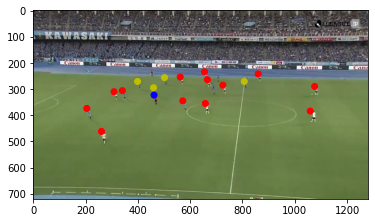

,source_path,frame_idx+1,ID,bbox_left,bbox_top,bbox_w,bbox_h,nomean1,nomean2,nomean3,...,bbox_G,bbox_R,bbox_H,bbox_S,bbox_V,player_flag,cluster,mean,cluster_mean,cluster_color
2,/content/drive/MyDrive/Soccer_analytics/movie1...,6,1,1059,384,21,46,-1,-1,-1,...,151.634576,107.150104,81.713251,88.474120,151.634576,1,1,1.0,1,r
3162,/content/drive/MyDrive/Soccer_analytics/movie1...,6,2,261,462,19,50,-1,-1,-1,...,141.461053,96.403158,83.522105,93.569474,141.914737,1,1,1.0,1,r
4233,/content/drive/MyDrive/Soccer_analytics/movie1...,6,3,658,355,23,41,-1,-1,-1,...,146.949099,97.725345,81.124072,94.297985,146.949099,1,1,1.0,1,r
9253,/content/drive/MyDrive/Soccer_analytics/movie1...,6,4,205,374,17,42,-1,-1,-1,...,130.836134,96.162465,64.935574,78.808123,132.163866,1,1,1.0,1,r
10265,/content/drive/MyDrive/Soccer_analytics/movie1...,6,5,725,285,12,37,-1,-1,-1,...,139.585586,102.443694,82.018018,75.752252,139.585586,1,1,1.0,1,r


In [14]:
#  Team classification 
#  Pre-process dataframe "data_you_need"

# 1. Column as person row or not
# creating a column if the row is for person
conditions_player = [
  data_you_need.ReID.str.contains('person')
]

choices_player = [1]
data_you_need['player_flag'] = np.select(conditions_player,choices_player,default=0)

# 2. Fill N/A with 0
data_you_need.fillna(0)


# 3. Import libraries
# Boiler plate tools :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Non-hierarchical clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 4. Choose clustering columns and apply K-means

features = ['bbox_H', 'bbox_S', 'bbox_V'] #'bbox_B', 'bbox_G','bbox_R']
data_p = data_you_need[data_you_need.player_flag==1]


# Clusterinng settings
kmeans = KMeans(n_clusters=3,    # num of clusters
                init = 'k-means++',# select k-means ++ method
                # init = 'random', # select a centroid ramdomly 
                n_init = 10,   # num of kmeans algorithm for different initial centroids
                max_iter = 300,  # nnum of max iteration for each kmeand algorithm
                tol = 1e-4,      # defiened errod as convergence
                random_state=0)  # state that is used ramdom genereator for initialize centrid 

clusters = kmeans.fit(data_p[features].values)


# Clustering data
Cluster_results = data_p
Cluster_results['cluster'] = clusters.labels_

# Check clustering
print(Cluster_results.groupby('cluster').count().iloc[:,1])


# Clensing cluster label
cleaned_labels = Cluster_results.groupby('ID')['cluster'].agg(['mean']).round().reset_index()
Cluster_results = pd.merge(Cluster_results,cleaned_labels,on='ID')
Cluster_results['cluster_mean'] = Cluster_results['mean'].astype('int')
Cluster_results.sort_values(['frame_idx+1','ID'])


# 5. Visualize results to check cluster by pointing frame_num
colors = {0: 'b',  1: 'r',    2: 'y',    3: 'c',     4: 'm'}


# Check visualization
frame_num=5
image = img_list[frame_num+1]
print("Image shape: {}".format(image.shape))
plt.imshow(image)
plt.scatter(x=Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].bbox_left, y=Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].bbox_top, color = [colors[r] for r in Cluster_results[Cluster_results['frame_idx+1']==frame_num+1]['cluster']])
plt.show()



# cluster color for mapping

conditions_color = [
  Cluster_results.cluster_mean==0,
  Cluster_results.cluster_mean==1
]

choices_color = ['y','r']

Cluster_results['cluster_color'] = np.select(conditions_color,choices_color,default='c')

Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].head()

# Union players data and ball data

In [15]:
print(Cluster_results.columns)
print('-'*10)
print(data_you_need.columns)
# print(data_you_need.sports_ball_flag.unique())

columns_to_union_player = ['source_path', 'frame_idx+1', 'ID', 'bbox_left', 'bbox_top', 'bbox_w',
       'bbox_h', 'ReID','conf_val', 'sports_ball_flag', 'person_flag', 'bbox_left_Hx',
       'bbox_top_Hy','player_flag', 'cluster_mean','cluster_color']

columns_to_union_ball = ['source_path', 'frame_idx+1', 'ID', 'bbox_left', 'bbox_top', 'bbox_w',
       'bbox_h', 'ReID','conf_val', 'sports_ball_flag', 'person_flag', 'bbox_left_Hx',
       'bbox_top_Hy','player_flag']

df_all = pd.concat([Cluster_results[columns_to_union_player],data_you_need[data_you_need.sports_ball_flag=='detected'][columns_to_union_ball]],ignore_index=True)
df_all.cluster_color.fillna('k',inplace=True)
df_all



Index(['source_path', 'frame_idx+1', 'ID', 'bbox_left', 'bbox_top', 'bbox_w',
       'bbox_h', 'nomean1', 'nomean2', 'nomean3', 'nomean4', 'nomean5', 'ReID',
       'conf_val', 'sports_ball_flag', 'person_flag', 'bbox_left_Hx',
       'bbox_top_Hy', 'bbox_B', 'bbox_G', 'bbox_R', 'bbox_H', 'bbox_S',
       'bbox_V', 'player_flag', 'cluster', 'mean', 'cluster_mean',
       'cluster_color'],
      dtype='object')
----------
Index(['source_path', 'frame_idx+1', 'ID', 'bbox_left', 'bbox_top', 'bbox_w',
       'bbox_h', 'nomean1', 'nomean2', 'nomean3', 'nomean4', 'nomean5', 'ReID',
       'conf_val', 'sports_ball_flag', 'person_flag', 'bbox_left_Hx',
       'bbox_top_Hy', 'bbox_B', 'bbox_G', 'bbox_R', 'bbox_H', 'bbox_S',
       'bbox_V', 'player_flag'],
      dtype='object')


,ID,ReID,bbox_h,bbox_left,bbox_left_Hx,bbox_top,bbox_top_Hy,bbox_w,cluster_color,cluster_mean,conf_val,frame_idx+1,person_flag,player_flag,source_path,sports_ball_flag
0,1,1_person,45,1059,291.0,385,307.0,21,r,1.0,0.84,4,detected,1,/content/drive/MyDrive/Soccer_analytics/movie1...,none
1,1,1_person,45,1059,291.0,385,306.0,21,r,1.0,0.85,5,detected,1,/content/drive/MyDrive/Soccer_analytics/movie1...,none
2,1,1_person,46,1059,291.0,384,306.0,21,r,1.0,0.85,6,detected,1,/content/drive/MyDrive/Soccer_analytics/movie1...,none
3,1,1_person,47,1058,291.0,383,306.0,24,r,1.0,0.83,7,detected,1,/content/drive/MyDrive/Soccer_analytics/movie1...,none
4,1,1_person,46,1059,291.0,383,306.0,23,r,1.0,0.84,8,detected,1,/content/drive/MyDrive/Soccer_analytics/movie1...,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117265,833,833_sportsball,10,783,299.0,355,217.0,9,k,NaN,0.51,5271,none,0,/content/drive/MyDrive/Soccer_analytics/movie1...,detected
117266,833,833_sportsball,10,781,300.0,355,218.0,10,k,NaN,0.53,5272,none,0,/content/drive/MyDrive/Soccer_analytics/movie1...,detected
117267,838,838_baseballbat,27,1177,394.0,287,172.0,42,k,NaN,0.56,5295,none,0,/content/drive/MyDrive/Soccer_analytics/movie1...,detected
117268,833,833_sportsball,7,761,314.0,353,221.0,7,k,NaN,0.50,5305,none,0,/content/drive/MyDrive/Soccer_analytics/movie1...,detected


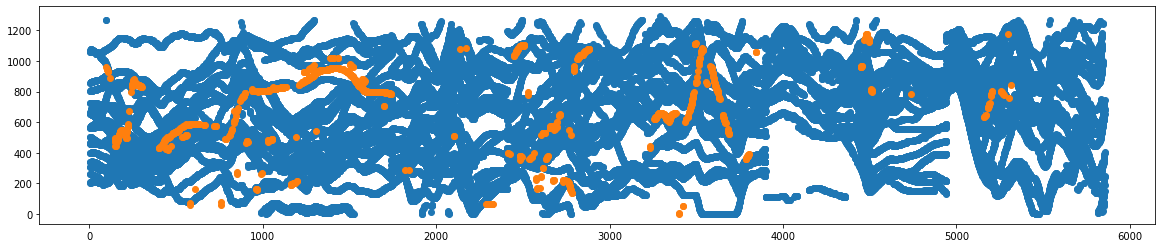

In [16]:
fig,ax = plt.subplots(figsize=(20,4))
ax.scatter(x=df_all[df_all.person_flag =='detected']['frame_idx+1'],y=df_all[df_all.person_flag =='detected']['bbox_left'])
ax.scatter(x=df_all[df_all.sports_ball_flag =='detected']['frame_idx+1'],y=df_all[df_all.sports_ball_flag =='detected']['bbox_left'])

# Movie Creation

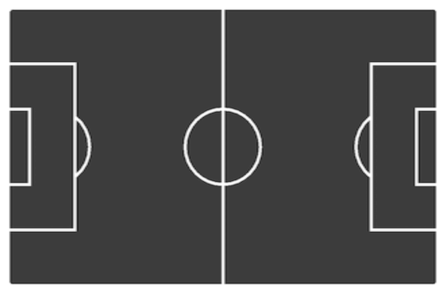

In [17]:
# Raw homography video

# cluster color for mapping

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
from matplotlib.animation import FuncAnimation 

output_mp4_path = '/content/drive/MyDrive/Soccer_analytics/Movie1.mp4'
# output_gif_path = '/content/drive/MyDrive/Soccer_analytics/20220624/base_anime.gif' 


# exported video size
# w was defined at previous cell as a scale of homoggraphy
# h was defined at previous cell as a scale of homography
video_w = 1050 
video_h = 680  

#original width and hight image/movie size
height, width, layers = img_list[0].shape
ow = width 
oh = height 


# re design template
template = cv2.imread('narya/world_cup_template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

fig_out,ax_out = plt.subplots()
plt.axis('off')
plt.xlim([0, video_w])
plt.ylim([0, video_h])
plt.gca().invert_yaxis()
plt.imshow(cv2.resize(template,(video_w,video_h)))
plt.gray()
fig_out.subplots_adjust(left=0, right=1, bottom=0, top=1) # this line makes it possible to delete margin

# https://qiita.com/shinmura0/items/ed96863281637e4fa10c

ims =[]
for frame_num, pre_image in enumerate(img_list):
  if frame_num> 3:
    # print('-'*50)
    # print('progress={}'.format(frame_num/len(img_list)))

    # # slice frame data
    df_video_slice = df_all[df_all['frame_idx+1']==frame_num]

    im = plt.scatter(x=df_video_slice['bbox_left_Hx']*video_w/w, y = df_video_slice['bbox_top_Hy']*video_h/h,marker='*',c=df_video_slice.cluster_color)
    ims.append([im])

  else:
    continue

ani = animation.ArtistAnimation(fig_out, ims, interval=50)
# ani.save(output_gif_path, writer="imagemagick")
ani.save(output_mp4_path, writer="ffmpeg")
plt.show()


In [21]:
#@title Combine movie into 1 movie

import cv2
 
# 2つの画像を横に連結する関数
def image_hcombine(im_info1, im_info2):
    img1 = im_info1[0]                       # 1つ目の画像
    img2 = im_info2[0]                       # 2つ目の画像
    color_flag1 = im_info1[1]                # 1つ目の画像のカラー/グレー判別値
    color_flag2 = im_info2[1]                # 2つ目の画像のカラー/グレー判別値
 
    # 1つ目の画像に対しカラーかグレースケールかによって読み込みを変える
    if color_flag1 == 1:
        h1, w1, ch1 = img1.shape[:3]         # 画像のサイズを取得（グレースケール画像は[:2]
    else:
        h1, w1 = img1.shape[:2]
 
    # 2つ目の画像に対しカラーかグレースケールかによって読み込みを変える
    if color_flag2 == 1:
        h2, w2, ch2 = img2.shape[:3]         # 画像のサイズを取得（グレースケール画像は[:2]
    else:
        h2, w2 = img2.shape[:2]
 
    # 2つの画像の縦サイズを比較して、大きい方に合わせて一方をリサイズする
    if h1 < h2:                              # 1つ目の画像の方が小さい場合
        w1 = int((h2 / h1) * w1) # 縦サイズの変化倍率を計算して横サイズを決定する
        h1 = h2                              # 小さい方を大きい方と同じ縦サイズにする
        img1 = cv2.resize(img1, (w1, h1))    # 画像リサイズ
    else:                                    # 2つ目の画像の方が小さい場合
        h2 = h1                              # 小さい方を大きい方と同じ縦サイズにする
        w2 = w1 #int((h1 / h2) * w1)             # 縦サイズの変化倍率を計算して横サイズを決定する
        img2 = cv2.resize(img2, (w2, h2))    # 画像リサイズ
 
    img = cv2.hconcat([img1, img2])          # 2つの画像を横方向に連結
    return img
 
# 動画を空間方向に連結させる関数
def m_space_hcombine(movie1, movie2, path_out, scale_factor):
    path1 = movie1[0]                                       # 1つ目の動画のパス
    path2 = movie2[0]                                       # 2つ目の動画のパス
    color_flag1 = movie1[1]                                 # 1つ目の動画がカラーかどうか
    color_flag2 = movie2[1]                                 # 2つ目の動画がカラーかどうか
 
    # 2つの動画の読み込み
    movie1_obj = cv2.VideoCapture(path1)
    movie2_obj = cv2.VideoCapture(path2)
 
    # ファイルからフレームを1枚ずつ取得して動画処理後に保存する
    i = 0                                                   # 第1ループ判定用指標
    while True:
        ret1, frame1 = movie1_obj.read()                    # 1つ目の動画のフレームを取得
        ret2, frame2 = movie2_obj.read()                    # 2つ目の動画のフレームを取得
        check = ret1 and ret2                               # 2つのフレームが共に取得できた時だけTrue（論理演算）
        if check == True:
            im_info1 = [frame1, color_flag1]                # 画像連結関数への引数1
            im_info2 = [frame2, color_flag2]                # 画像連結関数への引数2
 
            frame_mix = image_hcombine(im_info1, im_info2)  # 画像連結関数の実行
 
            if i == 0:
                # 動画ファイル保存用の設定
                fps = int(movie1_obj.get(cv2.CAP_PROP_FPS))                 # 元動画のFPSを取得
                fps_new = int(fps * scale_factor)                           # 動画保存時のFPSはスケールファクターをかける
                frame_size = frame_mix.shape[:3]                            # 結合したフレームのサイズを得る
                h = frame_size[0]                                           # フレームの高さサイズを取得
                w = frame_size[1]                                           # フレームの横サイズを取得
                fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')         # 動画保存時のfourcc設定（mp4用）
                video = cv2.VideoWriter(path_out, fourcc, fps_new, (w, h))  # 保存動画の仕様
                i = i + 1                                                   # 初期ループ判定用指標を増分
            else:
                pass
            video.write(frame_mix)                                          # 動画を保存する
        else:
            break
 
    # 動画オブジェクトの解放
    movie1_obj.release()
    movie2_obj.release()
    return
 
# ここからメイン実行文

left_movie_path  = '/content/drive/MyDrive/Soccer_analytics/Movie1.mp4' #@param {type: 'string'}
right_movie_path  = '/content/drive/MyDrive/Soccer_analytics/movie1.mp4'#@param {type: 'string'}

movie1 = [left_movie_path, False]     # 元動画のパス1, カラーはTrue
movie2 = [right_movie_path, False]    # 元動画のパス2, 白黒はFalse
path_out = /content/drive/MyDrive/Soccer_analytics/movie1_combine.mp4        #@param {type: 'string'} # 保存する動画のパス
scale_factor = 1                  # FPSにかけるスケールファクター

# 複数動画を連結させる関数を実行
m_space_hcombine(movie1, movie2, path_out, scale_factor)
print('done')

done


# Export all data

In [19]:

df_all.to_csv('/content/drive/MyDrive/Soccer_analytics/Movie1.csv', encoding='utf-8',index=False)

In [20]:
read_df = pd.read_csv('/content/drive/MyDrive/Soccer_analytics/SOCCERMATCH_TrimA.csv', encoding='utf-8')
read_df.head()

,ID,ReID,bbox_h,bbox_left,bbox_left_Hx,bbox_top,bbox_top_Hy,bbox_w,cluster_color,cluster_mean,conf_val,frame_idx+1,person_flag,player_flag,source_path,sports_ball_flag
0,1,1_person,92,941,293.0,563,503.0,36,y,0.0,0.92,4,detected,1,/content/drive/MyDrive/Soccer_analytics/SOCCER...,none
1,1,1_person,92,944,293.0,563,504.0,35,y,0.0,0.92,5,detected,1,/content/drive/MyDrive/Soccer_analytics/SOCCER...,none
2,1,1_person,92,945,293.0,563,503.0,35,y,0.0,0.92,6,detected,1,/content/drive/MyDrive/Soccer_analytics/SOCCER...,none
3,1,1_person,92,945,293.0,563,504.0,36,y,0.0,0.92,7,detected,1,/content/drive/MyDrive/Soccer_analytics/SOCCER...,none
4,1,1_person,93,947,293.0,562,502.0,35,y,0.0,0.92,8,detected,1,/content/drive/MyDrive/Soccer_analytics/SOCCER...,none
